# Welcome
 
My name is Tymek Majewski and this notebook is an **unfoffical** companion to Andrej Karpathy's [The spelled-out intro to language modeling: building makemore](https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)

<!--- The relevant repository with code is [karpathy/makemore](https://github.com/karpathy/makemore) ---> 


## 00:03:03 reading and exploring the dataset

> NOTE: 
> 
> In the video and in [makemore](https://github.com/karpathy/makemore) the data set used is a list of names (~32_000 entries).
> 
> Here a list of names of exoplantes from http://exoplanet.eu is used (5191 entries).  


> NOTE 2: 
>
> Both dataset use only lowercase letters. This is only so that it's easier to visualise the model.

In [75]:
words = open('data/exoplanet.eu_names.txt', 'r').read().splitlines()

# Please note that both this 

# First ten elements 
words[:10] # [:10] is the same as [0:10]


['11 com b',
 '11 oph b',
 '11 umi b',
 '14 and b',
 '14 her b',
 '14 her c',
 '16 cyg b b',
 '17 sco b',
 '18 del b',
 '1i']

BTW. The 10th item is the data set is 1I othewise known as [1I/ʻOumuamua](https://en.wikipedia.org/wiki/%CA%BBOumuamua) which is the 1st interstellar object detected passing through the Solar System! That's why it's called 1I - one interstellar. For added excitment check out the book by a Harvard University astronomer Avi Loeb entitled [Extraterrestrial: The First Sign of Intelligent Life Beyond Earth](https://en.wikipedia.org/wiki/Extraterrestrial:_The_First_Sign_of_Intelligent_Life_Beyond_Earth).

In [76]:
# Some data about the data: 
print(f"Number of inputs: {len(words)}")
shortest = min(words, key = len)
print(f"Shortest, with {len(shortest)} characters: {shortest} ")
longest = max(words, key = len)
print(f"Longest, with {len(longest)} characters: {longest}")

Number of inputs: 5197
Shortest, with 2 characters: 1i 
Longest, with 31 characters: gaia edr3 2077240046296834304 b


## 00:06:24 exploring the bigrams in the dataset

In [77]:
# Extract pairs of characters
wi = 0
for w in words[:3]:
    print(f'\nWord {wi}:')
    # Andrej used <S> and <E>, but I used '^' and '$' because '^' and '$': 
    # a) are single characters and will print nicer; and 
    # b) in reqular expressions they mean start and end of string  
    w = '^' + w + '$' 
    print(w)
    i = 0
    for ch1, ch2 in zip(w, w[1:]):
        print(f"{i * '_'}{ch1}{ch2}_")
        i+=1
    print(w)
    wi += 1


Word 0:
^11 com b$
^1_
_11_
__1 _
___ c_
____co_
_____om_
______m _
_______ b_
________b$_
^11 com b$

Word 1:
^11 oph b$
^1_
_11_
__1 _
___ o_
____op_
_____ph_
______h _
_______ b_
________b$_
^11 oph b$

Word 2:
^11 umi b$
^1_
_11_
__1 _
___ u_
____um_
_____mi_
______i _
_______ b_
________b$_
^11 umi b$


## 00:09:24 counting bigrams in a python dictionary

In [78]:
b = {}

# run for all words now
for w in words: 
    # Andrej used <S> and <E>, but I used '^' and '$' because '^' and '$': 
    # a) are single characters and will print nicer; and 
    # b) in reqular expressions they mean start and end of string  
    w = '^' + w + '$' 
    for ch1, ch2 in zip(w, w[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram, 0) + 1
        
sorted(b.items(), key = lambda kv: -kv[1])[:10]

[((' ', 'b'), 3830),
 (('b', '$'), 3816),
 (('^', 'k'), 2946),
 (('l', 'e'), 2527),
 (('e', 'p'), 2438),
 (('k', 'e'), 2420),
 (('r', '-'), 2418),
 (('e', 'r'), 2408),
 (('p', 'l'), 2401),
 (('-', '1'), 1563)]

In [79]:
3830/5200

0.7365384615384616

### Notes about this specific data set:

1. There are ~5200 names in the dataset
2. \>73% have ' b' bigram 
3. \>73% have 'b$' bigram
4. points 2 + 3 mean >73% end with ' b' 
5. \~50% start with 'kepler-' 

## 00:12:45 counting bigrams in a 2D torch tensor ("training the model")

In [80]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [81]:
import torch

In [82]:
# Andrej uses names so the number of characters is 26 + start + end, 28. 
# The dataset here is slightly different

chars = sorted(list(set(''.join(words))))

print(','.join(chars))
print(len(chars))


 ,(,),+,-,0,1,2,3,4,5,6,7,8,9,[,],a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
43


In [83]:
stoi = { s:i for i,s in enumerate(chars) }

stoi['^'] = len(chars) # index 48, so 49th character
stoi['$'] = len(chars)+1

print(list(stoi.items())[0:3])
print(list(stoi.items())[-3:])


[(' ', 0), ('(', 1), (')', 2)]
[('z', 42), ('^', 43), ('$', 44)]


In [84]:
# by default dtype is torch.float32 
N = torch.zeros(len(stoi),len(stoi), dtype=torch.int32)  

for w in words: 
    w = '^' + w + '$' 
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

## 00:18:19 visualizing the bigram tensor

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

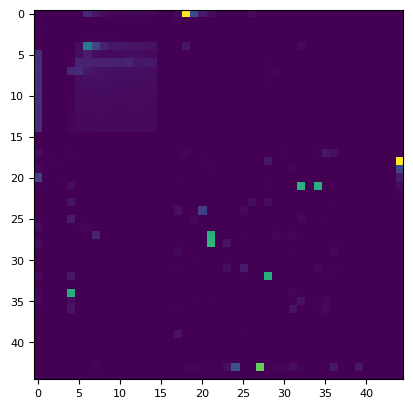

In [86]:
plt.imshow(N)

NOTE: The data looks very sparse

In [87]:
itos = {i: s for s, i in stoi.items()}

print(list(itos.items())[0:3])
print(list(itos.items())[-3:])

[(0, ' '), (1, '('), (2, ')')]
[(42, 'z'), (43, '^'), (44, '$')]


(-0.5, 44.5, 44.5, -0.5)

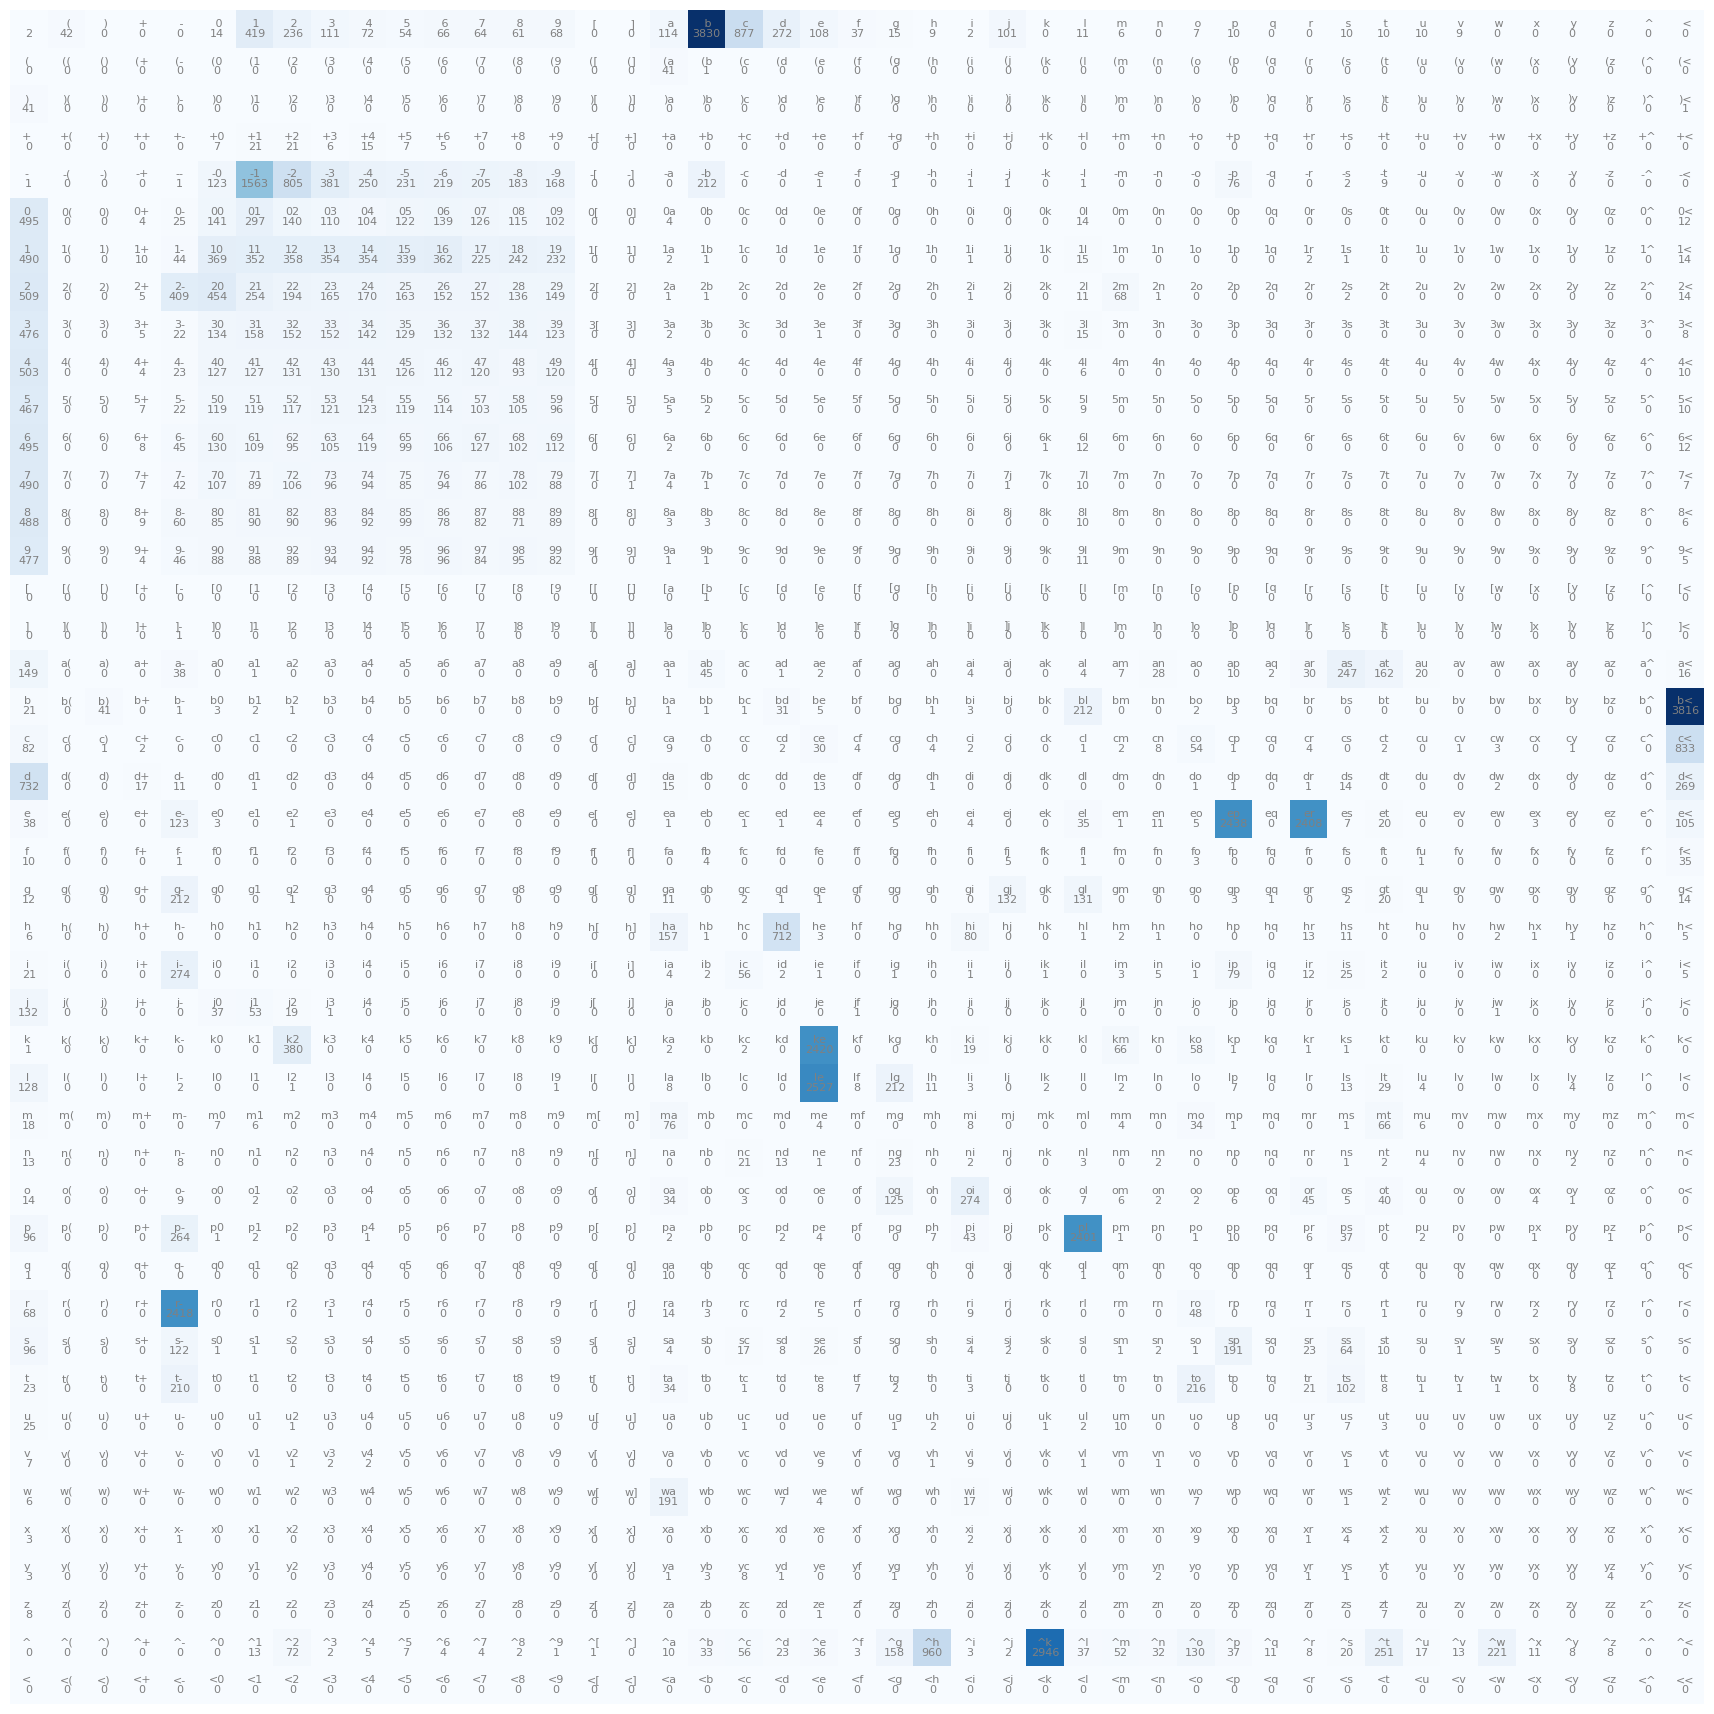

In [88]:
# this takes > 20 seconds
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(22,22))
plt.imshow(N, cmap="Blues")
for i in range(len(stoi)):
    for j in range(len(stoi)):
        chstr = itos[i]+itos[j]
        # 1. 'bottom' and 'top' seem to be reversed
        # 2. '$' is apparently not printable
        plt.text(j, i, chstr.replace('$', '<'), ha="center", va="bottom", color = "gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color = "gray")
        #plt.text(j, i, N[i, j].item(), ha="right", va="bottom", color = "yellow")

plt.axis('off')


NOTE: Notice:

1. The row of zeros for '^' being the 2nd character in a bigram (i.e. start of the word cannot the 'next' character) 
2. The column of zeros for '<' being the 1st character in a bigram (i.e end of the word cannot be the first character)


## 00:20:54 deleting spurious (S) and (E) tokens in favor of a single . 

In [90]:
stoi = { s:i+1 for i,s in enumerate(chars) }
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}


# by default dtype is torch.float32 
N = torch.zeros(len(stoi),len(stoi), dtype=torch.int32)  

for w in words: 
    w = '.' + w + '.' 
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        if(ix1 == 44):
            print(ch1)

        if(ix2 == 44):
            print(ch2)
        N[ix1, ix2] += 1

(-0.5, 43.5, 43.5, -0.5)

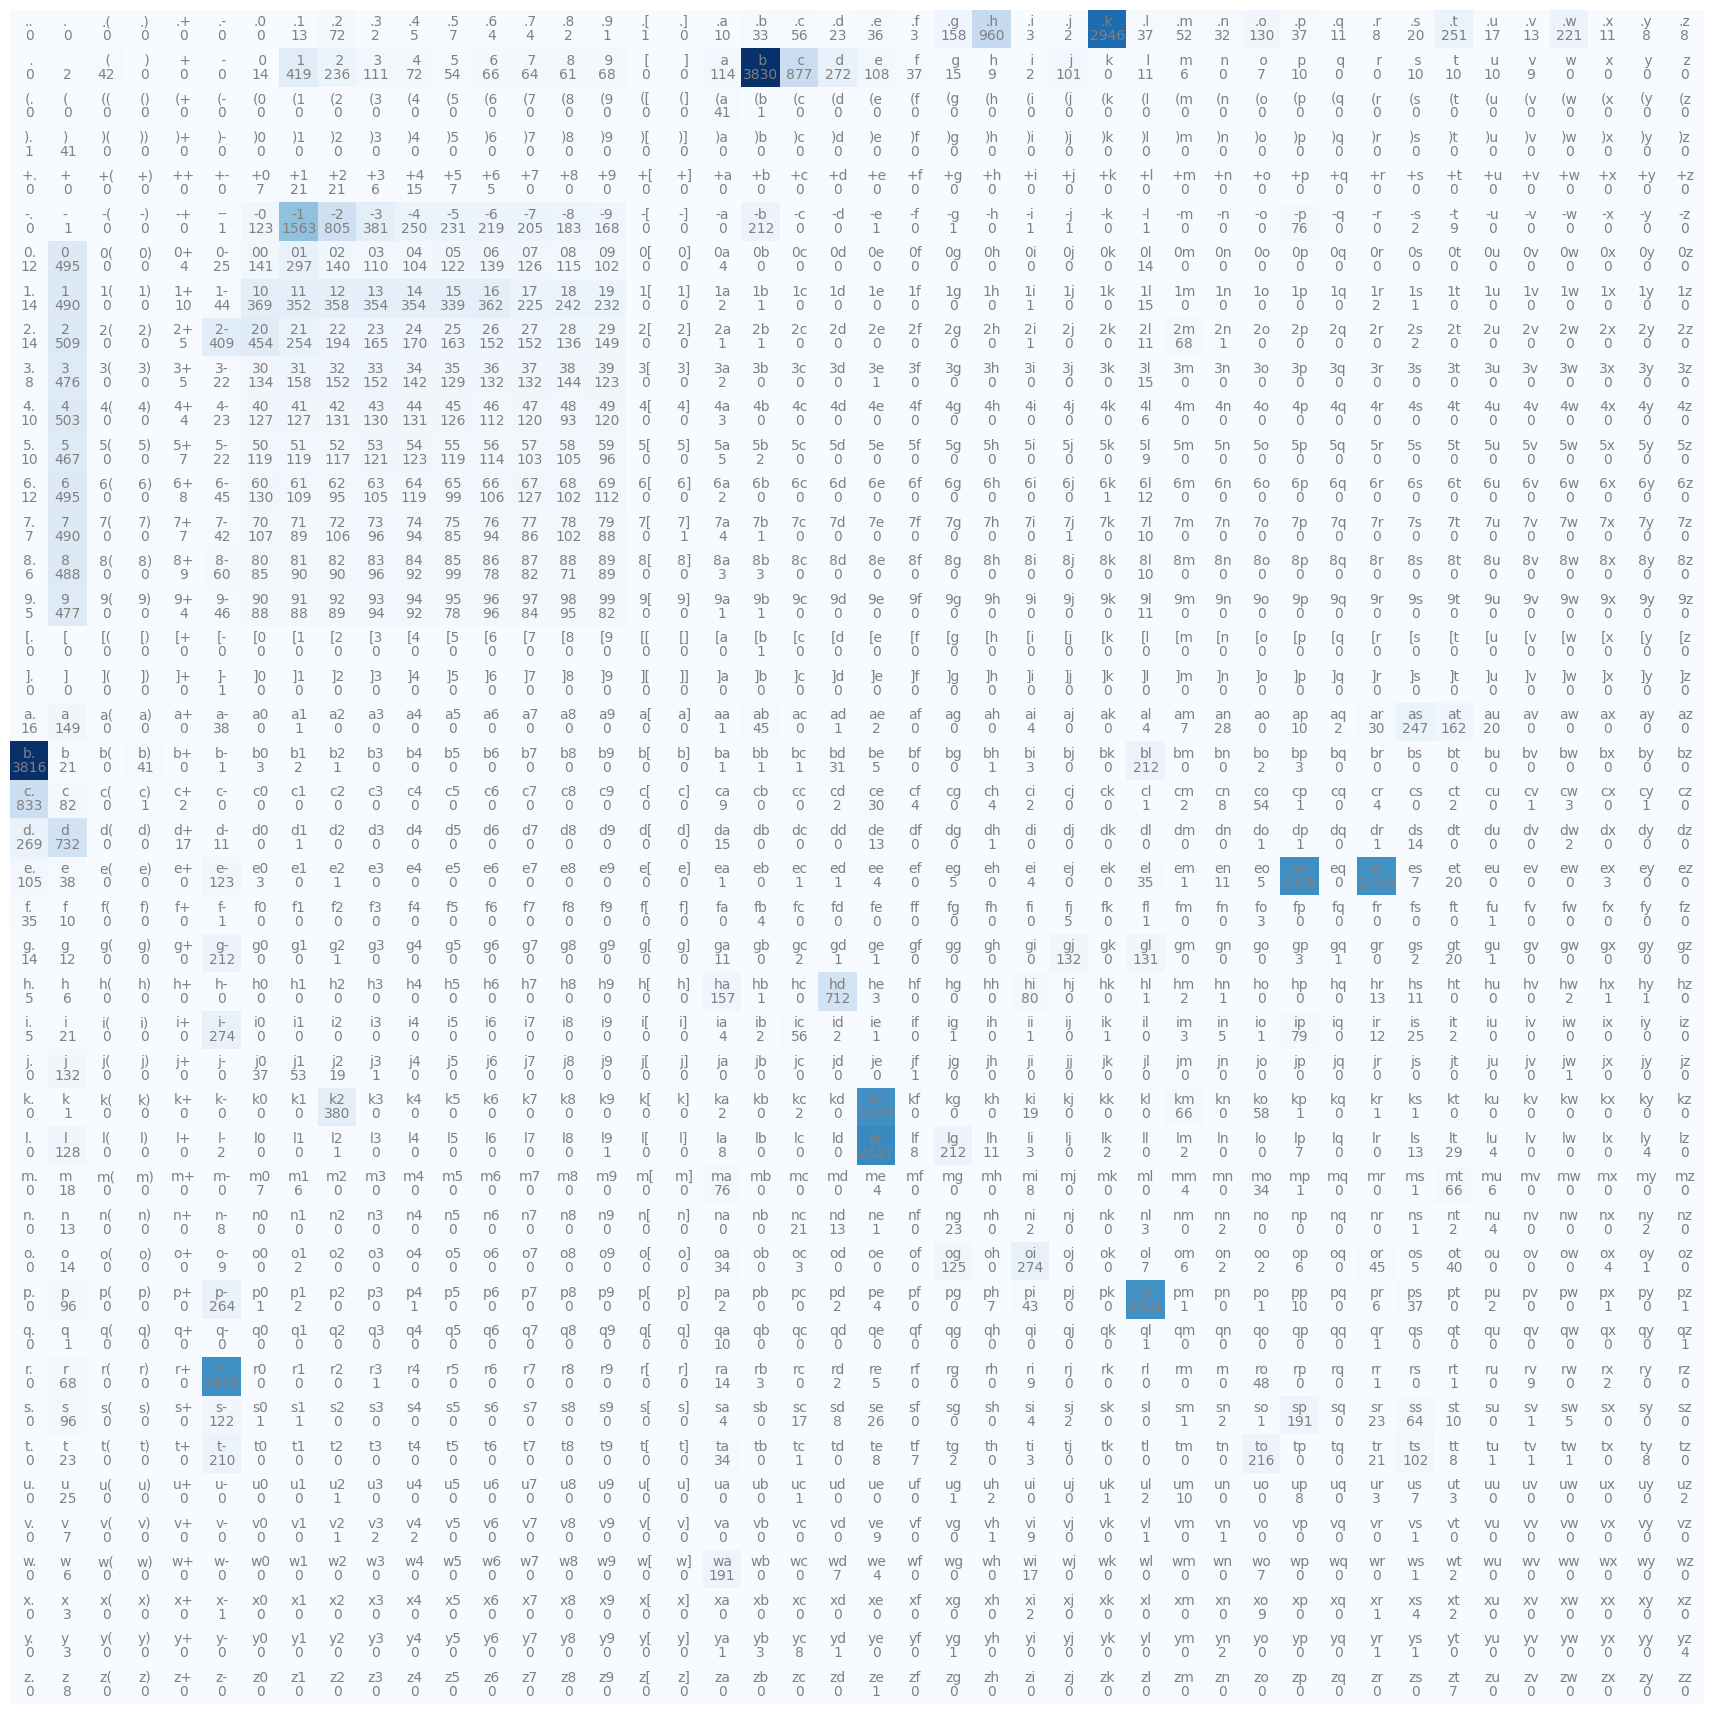

In [95]:
# this takes > 20 seconds
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22,22))
plt.imshow(N, cmap="Blues")
for i in range(len(stoi)):
    for j in range(len(stoi)):
        chstr = itos[i]+itos[j]
        # 'bottom' and 'top' seem to be reversed
        plt.text(j, i, chstr, ha="center", va="bottom", color = "gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color = "gray")
      
plt.axis('off')

## 00:24:02 sampling from the model


In [96]:
print(N[0])
print(N[0].shape)

tensor([   0,    0,    0,    0,    0,    0,    0,   13,   72,    2,    5,    7,
           4,    4,    2,    1,    1,    0,   10,   33,   56,   23,   36,    3,
         158,  960,    3,    2, 2946,   37,   52,   32,  130,   37,   11,    8,
          20,  251,   17,   13,  221,   11,    8,    8], dtype=torch.int32)
torch.Size([44])


In [174]:
# Converting from counts to propabilities
# 1. Converting to floats() to not do integeer division
# 2. We're operating on a tensor object and .float, and /= do the operations on each element  
P0 = N[0].float()
P0 /= P0.sum()

#print([round(f,2) for f in p.items()])
print([round(f.item(),3) for f in P0])
print()

# The numbers add up to 1
print(P0.sum())

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003, 0.014, 0.0, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.002, 0.006, 0.011, 0.004, 0.007, 0.001, 0.03, 0.185, 0.001, 0.0, 0.567, 0.007, 0.01, 0.006, 0.025, 0.007, 0.002, 0.002, 0.004, 0.048, 0.003, 0.003, 0.043, 0.002, 0.002, 0.002]

tensor(1.0000)


Help: [torch.tensor.multinomial/torch.multinomial](https://pytorch.org/docs/stable/generated/torch.multinomial.html)

In [163]:
# How multinomial works
g = torch.Generator().manual_seed(7)

numbers = torch.rand(3, generator= g)
print(f"Random numbers: {numbers}")

normalised = numbers/numbers.sum()

print(f"Normalised: {normalised}")
print(f"Sum of normalised: {normalised.sum()}")


# Helper to show distribution
def show_distribution(drawn_indexes):
    print()
    n = len(drawn_indexes)
    print(f"Distribution at {n} samples:")
    d = {}
    for index in drawn_indexes: d[index.item()] = d.get(index.item(),0) + 1

    for x in [(k, v, v/n) for k,v in sorted(d.items())]:
        print(f"\tindex={x[0]}, count={x[1]}, slice={x[2]}")


drawn20 = normalised.multinomial(num_samples=20, replacement= True, generator= g)
print(f"20 samples: {drawn20}")
show_distribution(drawn20)

drawn10k = normalised.multinomial(num_samples=10_000, replacement= True, generator= g)
show_distribution(drawn10k)


Random numbers: tensor([0.5349, 0.1988, 0.6592])
Normalised: tensor([0.3840, 0.1427, 0.4733])
Sum of normalised: 1.0
20 samples: tensor([0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0])

Distribution at 20 samples:
	index=0, count=6, slice=0.3
	index=1, count=2, slice=0.1
	index=2, count=12, slice=0.6

Distribution at 10000 samples:
	index=0, count=3877, slice=0.3877
	index=1, count=1418, slice=0.1418
	index=2, count=4705, slice=0.4705


NOTE: [torch.multinomial](https://pytorch.org/docs/stable/generated/torch.multinomial.html) has the following note. 

> Note
>
> The rows of input do not need to sum to one (in which case we use the values as weights), but must be non-negative, finite and have a non-zero sum.

This means that we don't need to normalise our inputs and torch.multinomial will still work. 

Let's check this:

In [167]:
# How multinomial works
g = torch.Generator().manual_seed(7)

numbers_b = torch.rand(3, generator= g)
drawn20_b = numbers_b.multinomial(num_samples=20, replacement= True, generator= g)

print(f"New 20 samples: {drawn20_b}")
print(f"Old 20 samples: {drawn20}")


New 20 samples: tensor([0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0])
Old 20 samples: tensor([0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0])


In [188]:
# Back to N

g = torch.Generator().manual_seed(7)
# One sample only 
Ni = N[0].float() # no need to normalise, torch.multinomial handles this
ix = Ni.multinomial(num_samples=1, replacement= True, generator= g).item()

itos[ix]

'k'

Note: Our draw is 'k' and this makes sense because there are a lot of items starting with 'kepler'

In [184]:
g = torch.Generator().manual_seed(7)

# Generate the 1 name 
ix = 0;
name = []; 
while True:
    Ni = N[ix].float() # no need to normalise, torch.multinomial handles this
    ix = Ni.multinomial(num_samples=1, replacement= True, generator= g).item()
    if ix == 0:
        break;
    name.append(itos[ix])


''.join(name)

'ker-97 b'

In [189]:
# Let's get 20 names

g = torch.Generator().manual_seed(7)

for i in range(20):
    ix = 0;
    name = []; 
    while True:
        Ni = N[ix].float() # no need to normalise, torch.multinomial handles this
        ix = Ni.multinomial(num_samples=1, replacement= True, generator= g).item()
        if ix == 0:
            break;
        name.append(itos[ix])


    print(''.join(name))

ker-97 b
k2 8 37 epssspler-7 ep-360 a b
keplepler-0108489775647233-211211009 b
hic
x c
keplepleplg-17 bd b
ker-47557189 d a
hipler-2 b
wasr-7-6335730 b
ker-13674 b
ttogplelepler-2 b
k2-181398526852017
ker-b
ker-346 b
kep-35 b
waswasplepler-252 b
r-105 b
hd b
hdhd b
hd cerogtoi-8 b) b


In [190]:
# What if the distribution was uniform
# In other words what would the name look like if all bigrams had the same chance of occuring:

g = torch.Generator().manual_seed(7)

for i in range(20):
    ix = 0;
    name = []; 
    while True:
        Ni = torch.ones(len(N[0])) # If all counts are 1 then all 'next-letter' are equally likely
        ix = Ni.multinomial(num_samples=1, replacement= True, generator= g).item()
        if ix == 0:
            break;
        name.append(itos[ix])


    print(''.join(name))

66tkws6gpp((1 -t
x+zwul7voxs0yf)kn9(2(o9av9d31r9gr
[3wmwxstorirfjf5cf89e637y8ga5xnpz
t[q14[75[][pw9-s6lxe6ufjmelunlsbwy7w82
)yt0)l8d
g5z5jtbr8phelsh70djsiij cprl0m3wyd0x3o(08]+u5e l7g+5 wcexunervmd[cs
6]y)y
6awljjp1nqgm))jn33oybmz8lf956j-vicoe cfv771n5]g43b344ozoag607kvvwz7zo88u(2xtaikxgi3i0 6[y+xup7yg[shz5o 8
sln5d19n))92x-)045rpx ]h
h[34ra -tn7mjtvmmogt+9-[7i9
htfm)bm5n0
08igp)[p9upm9q
-
tqwxv[0t26gdrn[gdc7e3yytvw9oz8txln
bn4a37661l7ov

bz)6o75m7ts+yqd]q9u8h-npa)fx5u[jfs2n7[r7ru9odd19knt6n7sf5f-[khc9f9znbn5zofudgafxc)[ sgcoxa6aydvbrnzr1+2i6jiyq+1cokp(bsyw
m5(rlp67x 38s68x8mqkq rfxdavs- (en0t]g1fjx0jf9fovez [thzno)4y)sbs8ogwqm1r-)q+(2p2frd2gi2aa qq(lq5y4afsaf 6h6aq4p(am83m
m65]5)kw
q-fw0qym4ds+sxi1g]a4 v-gif[6[yoerezb6s5b9avf3kp x0bv8w7cist+46oi6smuchiv6t n [gpz463gw-c]21b-txzu(-nchi8wu-x(i7ked3j-v(uigitgb08ov44sq278vi3wk]3d


## 00:36:17 efficiency! vectorized normalization of the rows, tensor broadcasting 






00:50:14 loss function (the negative log likelihood of the data under our model)
01:00:50 model smoothing with fake counts
01:02:57 PART 2: the neural network approach: intro
01:05:26 creating the bigram dataset for the neural net
01:10:01 feeding integers into neural nets? one-hot encodings
01:13:53 the "neural net": one linear layer of neurons implemented with matrix multiplication
01:18:46 transforming neural net outputs into probabilities: the softmax
01:26:17 summary, preview to next steps, reference to micrograd
01:35:49 vectorized loss
01:38:36 backward and update, in PyTorch
01:42:55 putting everything together
01:47:49 note 1: one-hot encoding really just selects a row of the next Linear layer's weight matrix
01:50:18 note 2: model smoothing as regularization loss
01:54:31 sampling from the neural net
01:56:16 conclusion

## Further reading aka Links 

From the video:
* [karpathy/makemore](https://github.com/karpathy/makemore) 
* PyTorch's [Broadcasting semantics](https://pytorch.org/docs/stable/notes/broadcasting.html)

Other: 
* About the data:
  * http://exoplanet.eu
  * https://xkcd.com/1071/
  * http://codementum.org/exoplanets/
  * [ʻOumuamua](https://en.wikipedia.org/wiki/%CA%BBOumuamua) 
  * [Extraterrestrial: The First Sign of Intelligent Life Beyond Earth](https://en.wikipedia.org/wiki/Extraterrestrial:_The_First_Sign_of_Intelligent_Life_Beyond_Earth).
* [Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)
